In [1]:
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt; import os; from skimage.io import imread, imshow; from skimage.color import rgb2gray; from skimage.morphology import (erosion, dilation, closing, opening, area_closing, area_opening);from skimage.measure import label, regionprops, regionprops_table;import cv2;from matplotlib.backends.backend_pdf import PdfPages;import argparse;from statistics import mean;import json;from IPython.display import Image;from IPython.core.display import display, HTML;display(HTML("<style>.container { width:100% !important; }</style>"))

### Stores info about all original images
area, narrowness, orientation information

In [32]:
dictOfAllProperties = {}
root  = r"Basal_Nerve_Density_Images"
for subdir, dirs, imgs in os.walk(root):
    dictOfPatientProperties = {}; imagesInThisFolder = False
    print(subdir)
    for img in imgs:
        imagesInThisFolder = True;
        if("count" not in img and 'jpg' in img):
            image = cv2.imread(os.getcwd() + '\\' + subdir + '\\' + img, cv2.IMREAD_GRAYSCALE)
            try: 
                print(img)
                propertiesDF = pd.DataFrame(regionprops_table(label(image), image, properties = ('major_axis_length', 'minor_axis_length', 'area', 'orientation'))); 
                newPropertiesDF = propertiesDF[propertiesDF.area > 7]
                newPropertiesDF['narrowness'] = newPropertiesDF['major_axis_length']/newPropertiesDF['minor_axis_length'];
                dictOfPatientProperties['%s\%s'%(subdir, img)] = newPropertiesDF
                del propertiesDF; del newPropertiesDF
            except:
                print('whoops')
                dictOfPatientProperties['%s\%s'%(subdir, img)] = 0
    if(imagesInThisFolder == True): 
        dictOfAllProperties['%s'%subdir] = dictOfPatientProperties 

Basal_Nerve_Density_Images
Basal_Nerve_Density_Images\Control
Basal_Nerve_Density_Images\Control\N1-od-0
-00.jpg


C:\Users\dylan\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


-01.jpg
-02.jpg
-03.jpg
-04.jpg
-05.jpg
-06.jpg
-07.jpg
-08.jpg
-09.jpg
-10.jpg
-11.jpg
-12.jpg
-13.jpg
-14.jpg
-15.jpg
-16.jpg
-17.jpg
-18.jpg
-19.jpg
-20.jpg
-21.jpg
-22.jpg
-23.jpg
-24.jpg
-25.jpg
-26.jpg
-27.jpg
-28.jpg
-29.jpg
-30.jpg
-31.jpg
-32.jpg
-33.jpg
-34.jpg
-35.jpg
-36.jpg
-37.jpg
-38.jpg
-39.jpg
Basal_Nerve_Density_Images\Control\N1-os-46
-00.jpg
-01.jpg
-02.jpg
-03.jpg
-04.jpg
-05.jpg
-06.jpg
-07.jpg
-08.jpg
-09.jpg
-10.jpg
-11.jpg
-12.jpg
-13.jpg
-14.jpg
-15.jpg
-16.jpg
-17.jpg
-18.jpg
-19.jpg
-20.jpg
-21.jpg
-22.jpg
-23.jpg
-24.jpg
-25.jpg
-26.jpg
-27.jpg
-28.jpg
-29.jpg
-30.jpg
-31.jpg
-32.jpg
-33.jpg
-34.jpg
-35.jpg
-36.jpg
-37.jpg
-38.jpg
-39.jpg
Basal_Nerve_Density_Images\Control\N2-od-2
-00.jpg
-01.jpg
-02.jpg
-03.jpg
-04.jpg
-05.jpg
-06.jpg
-07.jpg
-08.jpg
-09.jpg
-10.jpg
-11.jpg
-12.jpg
-13.jpg
-14.jpg
-15.jpg
-16.jpg
-17.jpg
-18.jpg
-19.jpg
-20.jpg
-21.jpg
-22.jpg
-23.jpg
-24.jpg
-25.jpg
-26.jpg
-27.jpg
-28.jpg
-29.jpg
-30.jpg
-31.jpg
-32.jpg
-33.jpg
-34.jpg
-

In [39]:
dictOfAllProperties.keys()

dict_keys(['Basal_Nerve_Density_Images\\Control\\N1-od-0', 'Basal_Nerve_Density_Images\\Control\\N1-os-46', 'Basal_Nerve_Density_Images\\Control\\N2-od-2'])

In [81]:
#Example of an entry
dictOfAllProperties['Basal_Nerve_Density_Images\Control\\N1-od-0']['Basal_Nerve_Density_Images\Control\\N1-od-0\-00.jpg']

,major_axis_length,minor_axis_length,area,orientation,narrowness
0,455.850116,243.848019,33075,0.063267,1.869403
4,5.293185,3.084324,9,0.140616,1.716157
6,13.259825,7.416058,21,-0.668735,1.787988
7,8.664307,1.253695,9,-0.010751,6.911015
8,9.165151,2.000000,16,0.000000,4.582576
...,...,...,...,...,...
8352,9.206254,1.828563,9,1.519755,5.034693
8363,31.158598,0.951753,27,-1.556743,32.738104
8408,9.850849,1.985817,17,1.549381,4.960602
8416,9.165151,0.000000,8,1.570796,inf


In [1]:
#Graphs histograms of all orientation distributions for a patient. 
#I am not sure if it works right now but a slight modification of it was working.
#Switch the root accordingly. As is, it only does it for one patient. 
i = 0
root  = r'Basal_Nerve_Density_Images\Control\\N1-od-0'
for subdir, dirs, images in os.walk(root):
    fig = plt.figure(figsize=(40,40))
    for img in images:
        if('jpg' in img and 'count' not in img):
            print('%s\%s'%(subdir, img))
            i += 1
            plt.subplot(12,12,i+1)
            plt.ylabel('Image #%s' %img)
            #print(dictOfAllProperties[subdir]['%s\%s'%(subdir, img)]['orientation'])
            plt.hist(dictOfAllProperties[subdir]['%s%s'%(subdir, img)]['orientation'], bins=30)
            print(i, "did not have data")
            print(i)

NameError: name 'os' is not defined

In [8]:
'''Attempted multiple ways to store the original image information (a dictionary of dictionaries with dataframes)
but they didnt work. This would be helpful to do so the images don't have to be read in and be
analyzed each time the program is run. That step takes a long time.'''

#import pickle
#with open('dictOfAllPropertiesOriginalImages.pickle', 'wb') as to_write:
#    pickle.dump(dictOfAllProperties, to_write)

#dictOfAllKL = {}
#for subdir in dictOfAllProperties.keys():
 #   dictOfAllKL[subdir] = {}
  #  KLDict = []
   # for img in dictOfAllProperties[subdir].keys():
    #    orientdist = []
     #   d = dictOfAllProperties['%s'%subdir]['%s'%(img)]['orientation']
      #  print(d)
       # for i in range(0,len(d)):
        #    if(abs(d[i]) > 0.06):
         #       orientdist.append(d[i])
        #uniformorientdist = np.full(1,len(orientdist),mean(orientdist))
        #KLDict[img] = KL(orientdist, uniformorientdist)
    #dictOfAllKL[subdir] = KLDict
    
#dict2 = dictOfAllProperties
#f = open('dictOfOriginalImageProperties.pkl')
#dictOfAllProperties = pickle.load(f)
#f.close()
#dictOfAllProperties

# Functions

#### 'Filters' the information to return the large narrow oriented connected components according to the specified boundaries

In [25]:
def LNO_CCCount_Original(df, largeCutoff, narrowCutoff, orientCutoff):
    NL_CCs = [];
    for i in range(0,len(df)):
        if(df['narrowness'].iloc[i] > narrowCutoff and df['area'].iloc[i] > largeCutoff): 
            NL_CCs.append(df['orientation'].iloc[i])
    mean_NLR = np.mean(NL_CCs)
    
    NLO_CCCount = 0;
    for i in range(0,len(NL_CCs)):
        if((mean_NLR - orientCutoff) <= NL_CCs[i] <= (mean_NLR + orientCutoff)):    
            NLO_CCCount += 1
    return NLO_CCCount

#### Returns the Nerve/Non-Nerve Cutoff Value (% of Max) for Number of Large Regions

In [5]:
#This function determines the best threshold for nerve/non-nerve images based on the percentage of the max amount of large connected components 
def findDecThreshold(largeRegionDict):
    avgDArray = []
    for dec in range(0,120):
        dec = dec/100; evalArrayDice = []; patientNames = list(largeRegionDict.keys())
        for pat in range(0,len(patientNames)):
            nerveStart = whichImagesHaveNerves['First Nerve Image'].loc[pat]; nerveEnd = whichImagesHaveNerves['Last Nerve Image'].loc[pat]
            regionCountsFor40 = largeRegionDict[patientNames[pat]]; thresholdNumLargeRegions = dec*max(regionCountsFor40)
            FP = 0; FN = 0; TP = 0; TN = 0
            for i in range(0,len(regionCountsFor40)):
                if(regionCountsFor40[i] >= thresholdNumLargeRegions):  #If the number of regions is less than the cutoff
                    if(i in np.arange(nerveStart,nerveEnd)):           #and if the image is known to have nerves...TP
                        TP += 1
                    else:                                              #or if the image is known to not have nerves...FP
                        FP += 1
                else:                                               #If the number of regions is more than the cutoff
                    if(i in np.arange(nerveStart,nerveEnd)):           #and if the image is known to have nerves...
                        FN += 1
                    else:                                              #or if the image is known to not have nerves...FP
                        TN += 1
            dice = (2*TP)/(2*TP + FP + FN)
            evalArrayDice.append(dice)
        avgDice = mean(evalArrayDice)
        avgDArray.append(avgDice)
    plt.xlabel('Threshold for Nerve/Non-Nerve #Large Regions (Percent of Max)'); plt.ylabel('Average Dice Score'); plt.plot(np.arange(0,120),avgDArray);
    dec = avgDArray.index(max(avgDArray))/100   #The decimal to multiple by the max region count result, the best threshold to maximize the Dice score. 
    return dec

#### Caclulate the Dice Score

In [6]:
#Calculates the Dice (i.e. F1 score)
def calculateDice(largeRegionDict,dec):
    diceForPatients = []
    patientNames = list(largeRegionDict.keys())
    if(len(patientNames) > 0):
        for pat in range(0,len(patientNames)):
            nerveStart = whichImagesHaveNerves['First Nerve Image'].loc[pat]
            nerveEnd = whichImagesHaveNerves['Last Nerve Image'].loc[pat]
            regionCountsFor40 = largeRegionDict[patientNames[pat]]
            thresholdNumLargeRegions = dec*max(regionCountsFor40)
            FP = 0; FN = 0; TP = 0; TN = 0
            for i in range(0,len(regionCountsFor40)):
                if(regionCountsFor40[i] >= thresholdNumLargeRegions):  #If the number of regions is less than the cutoff
                    if(i in np.arange(nerveStart,nerveEnd)):           #and if the image is known to have nerves...TP
                        TP += 1
                    else:                                              #or if the image is known to not have nerves...FP
                        FP += 1
                else:                                               #If the number of regions is more than the cutoff
                    if(i in np.arange(nerveStart,nerveEnd)):           #and if the image is known to have nerves...
                        FN += 1
                    else:                                              #or if the image is known to not have nerves...FP
                        TN += 1
            dice = (2*TP)/(2*TP + FP + FN)
            diceForPatients.append(dice)
        avgDice = mean(diceForPatients)
    else:
        print('No Patients found here'); avgDice = 0
    return avgDice

### Main LNO (Uses set parameters): Finds the Number of Large Narrow Similarly-Oriented Connected Components (LNO CC) for Each Patients' Images

In [40]:
largeCutoff = 7; narrowCutoff = 1.5; orientCutoff = 0.8; LNOCC_12Patients = {}; root = r"Basal_Nerve_Density_Images"
root  = r"Basal_Nerve_Density_Images"

###FOR EACH PATIENT IN THE PATIENT LIST
for subdir, dirs, imgs in os.walk(root):
        imagesInThisFolder = False
        patientLNO_CC = []   #large narrow oriented connected components for a patient
        ###FOR ALL IMAGES PER A PATIENT-X
        print(subdir)
        for img in imgs: 
            imagesInThisFolder = True; ItIsAnImage = "count" not in img and 'jpg' in img
            if(ItIsAnImage): 
                df = dictOfAllProperties['%s'%subdir]['%s\%s'%(subdir, img)]
                try: patientLNO_CC.append(LNO_CCCount_Original(df, largeCutoff, narrowCutoff, orientCutoff))                           #Does blurring, morphological transforms, and Canny Edge
                except: patientLNO_CC.append(0)
        if(imagesInThisFolder == True): LNOCC_12Patients[subdir[27:]] = patientLNO_CC
#RETURNS LNOCC_12Patients

Basal_Nerve_Density_Images
Basal_Nerve_Density_Images\Control
Basal_Nerve_Density_Images\Control\N1-od-0
Basal_Nerve_Density_Images\Control\N1-os-46
Basal_Nerve_Density_Images\Control\N2-od-2
Basal_Nerve_Density_Images\Mild
Basal_Nerve_Density_Images\Mild\12-od-4
Basal_Nerve_Density_Images\Mild\65-od-3
Basal_Nerve_Density_Images\Mild\69-os-29
Basal_Nerve_Density_Images\Moderate
Basal_Nerve_Density_Images\Moderate\10-os
Basal_Nerve_Density_Images\Moderate\38-os-0
Basal_Nerve_Density_Images\Moderate\70-os-52
Basal_Nerve_Density_Images\Severe
Basal_Nerve_Density_Images\Severe\1-os-6
Basal_Nerve_Density_Images\Severe\42-od-6
Basal_Nerve_Density_Images\Severe\48_od_1


In [41]:
LNOCC_12Patients

{'Control\\N1-od-0': [921,
  1155,
  1346,
  1299,
  876,
  273,
  101,
  68,
  222,
  483,
  643,
  631,
  821,
  1201,
  1396,
  1446,
  2022,
  1944,
  1861,
  1792,
  1359,
  1301,
  1770,
  1252,
  1117,
  1009,
  922,
  829,
  650,
  517,
  417,
  302,
  181,
  100,
  84,
  87,
  62,
  54,
  37,
  27],
 'Control\\N1-os-46': [115,
  133,
  35,
  128,
  134,
  245,
  133,
  141,
  112,
  105,
  81,
  61,
  33,
  24,
  17,
  7,
  5,
  5,
  3,
  3,
  5,
  8,
  5,
  10,
  16,
  13,
  14,
  10,
  17,
  6,
  20,
  4,
  5,
  11,
  7,
  14,
  11,
  19,
  18,
  27],
 'Control\\N2-od-2': [1068,
  1435,
  1388,
  1243,
  671,
  392,
  287,
  321,
  139,
  601,
  1336,
  1407,
  1338,
  1253,
  1338,
  1601,
  1822,
  1810,
  1627,
  1533,
  1589,
  1314,
  1183,
  1047,
  786,
  738,
  695,
  570,
  475,
  336,
  166,
  55,
  26,
  22,
  26,
  154,
  276,
  198,
  125,
  54],
 'Mild\\12-od-4': [623,
  218,
  73,
  104,
  139,
  540,
  1117,
  1582,
  1516,
  1726,
  1676,
  1699,
  1634,
  1

### Main: Runs and Evaluates the LNO CC Model

In [17]:
whichImagesHaveNerves = pd.read_csv("IndicesForImagesWithAndWithoutNerves.csv")

0.436584456328454


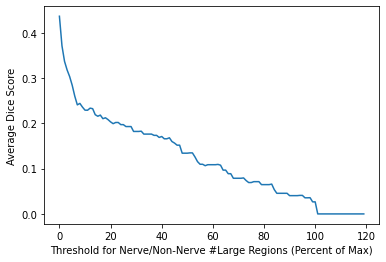

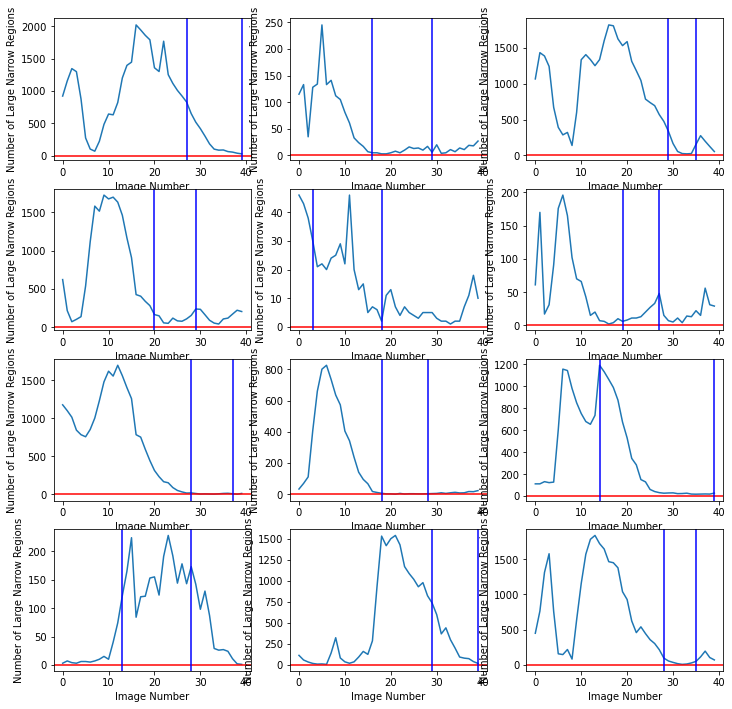

In [48]:
dec = findDecThreshold(LNOCC_12Patients)
dice = calculateDice(LNOCC_12Patients, dec)
print(dice)

with PdfPages('scatterplotsNarrowLarge%sAnd%s-Conditions4.pdf' %(largeCutoff,narrowCutoff)) as pdf:
    fig = plt.figure(figsize=(12,12))
    for pat in range(0,12):
        ax = fig.add_subplot(4,3,pat+1); 
        patient = list(LNOCC_12Patients.keys());
        x = np.arange(0,40);y = LNOCC_12Patients[patient[pat]]; 
        ax.plot(x,y);
        nerveStart = whichImagesHaveNerves['First Nerve Image'].loc[pat]; 
        nerveEnd = whichImagesHaveNerves['Last Nerve Image'].loc[pat]; 
        plt.xlabel('Image Number'); 
        plt.ylabel('Number of Large Narrow Regions'); 
        plt.axhline(y = dec*max(LNOCC_12Patients[patient[pat]]), color = 'r'); 
        plt.axvline(x = nerveStart, color = 'b'); 
        plt.axvline(x = nerveEnd, color = 'b')
    pdf.savefig(fig)

### Main LNO (Test different parameters): Finds the Number of Large Narrow ConnectedComponents for Each Patients' Images

Large Area Threshold: 7, Narrow Threshold 1.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156
Large Area Threshold: 7, Narrow Threshold 1.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156
Large Area Threshold: 7, Narrow Threshold 1.000000 Orient Threshold: 0.300000 Dice = 0.47058823529411764
Large Area Threshold: 7, Narrow Threshold 1.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156
Large Area Threshold: 7, Narrow Threshold 1.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156
Large Area Threshold: 7, Narrow Threshold 1.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156
Large Area Threshold: 7, Narrow Threshold 1.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156
Large Area Threshold: 7, Narrow Threshold 1.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156
Large Area Threshold: 7, Narrow Threshold 1.000000 Orient Threshold: 0.900000 Dice = 0.47058823529411764
Large Area Threshold: 7, Narrow Threshold 6.000000 Orie

C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 11.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 11.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 11.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 11.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 11.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 11.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 11.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 11.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 11.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 16.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 16.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 16.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 16.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 16.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 16.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 16.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 16.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 16.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 21.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 21.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 21.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 21.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 21.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 21.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 21.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 21.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 21.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 26.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 26.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 26.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 26.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 26.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 26.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 26.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 26.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 26.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 31.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 31.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 31.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 31.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 31.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 31.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 31.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 31.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 31.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 36.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 36.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 36.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 36.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 36.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 36.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 36.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 36.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 7, Narrow Threshold 36.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 1.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 1.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 1.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 1.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 1.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 1.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 1.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 1.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 1.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 6.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 6.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 6.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 6.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 6.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 6.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 6.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 6.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 6.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 11.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 11.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 11.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 11.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 11.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 11.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 11.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 11.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 11.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 16.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 16.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 16.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 16.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 16.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 16.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 16.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 16.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 16.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 21.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 21.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 21.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 21.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 21.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 21.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 21.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 21.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 21.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 26.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 26.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 26.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 26.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 26.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 26.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 26.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 26.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 26.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 31.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 31.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 31.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 31.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 31.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 31.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 31.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 31.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 31.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 36.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 36.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 36.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 36.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 36.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 36.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 36.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 36.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 17, Narrow Threshold 36.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 1.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 1.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 1.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 1.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 1.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 1.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 1.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 1.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 1.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 6.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 6.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 6.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 6.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 6.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 6.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 6.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 6.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 6.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 11.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 11.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 11.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 11.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 11.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 11.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 11.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 11.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 11.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 16.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 16.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 16.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 16.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 16.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 16.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 16.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 16.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 16.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 21.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 21.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 21.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 21.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 21.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 21.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 21.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 21.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 21.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 26.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 26.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 26.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 26.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 26.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 26.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 26.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 26.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 26.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 31.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 31.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 31.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 31.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 31.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 31.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 31.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 31.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 31.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 36.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 36.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 36.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 36.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 36.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 36.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 36.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 36.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 27, Narrow Threshold 36.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 1.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 1.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 1.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 1.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 1.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 1.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 1.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 1.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 1.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 6.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 6.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 6.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 6.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 6.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 6.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 6.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 6.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 6.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 11.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 11.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 11.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 11.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 11.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 11.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 11.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 11.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 11.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 16.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 16.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 16.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 16.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 16.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 16.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 16.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 16.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 16.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 21.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 21.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 21.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 21.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 21.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 21.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 21.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 21.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 21.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 26.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 26.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 26.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 26.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 26.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 26.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 26.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 26.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 26.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 31.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 31.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 31.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 31.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 31.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 31.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 31.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 31.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 31.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 36.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 36.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 36.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 36.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 36.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 36.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 36.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 36.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 37, Narrow Threshold 36.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 1.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 1.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 1.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 1.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 1.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 1.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 1.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 1.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 1.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 6.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 6.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 6.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 6.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 6.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 6.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 6.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 6.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 6.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 11.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 11.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 11.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 11.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 11.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 11.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 11.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 11.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 11.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 16.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 16.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 16.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 16.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 16.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 16.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 16.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 16.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 16.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 21.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 21.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 21.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 21.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 21.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 21.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 21.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 21.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 21.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 26.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 26.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 26.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 26.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 26.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 26.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 26.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 26.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 26.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 31.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 31.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 31.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 31.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 31.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 31.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 31.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 31.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 31.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 36.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 36.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 36.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 36.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 36.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 36.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 36.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 36.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 47, Narrow Threshold 36.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 1.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 1.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 1.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 1.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 1.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 1.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 1.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 1.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 1.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 6.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 6.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 6.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 6.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 6.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 6.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 6.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 6.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 6.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 11.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 11.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 11.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 11.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 11.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 11.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 11.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 11.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 11.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 16.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 16.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 16.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 16.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 16.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 16.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 16.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 16.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 16.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 21.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 21.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 21.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 21.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 21.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 21.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 21.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 21.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 21.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 26.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 26.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 26.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 26.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 26.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 26.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 26.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 26.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 26.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 31.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 31.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 31.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 31.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 31.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 31.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 31.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 31.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 31.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 36.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 36.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 36.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 36.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 36.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 36.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 36.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 36.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 57, Narrow Threshold 36.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 1.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 1.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 1.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 1.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 1.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 1.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 1.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 1.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 1.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 6.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 6.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 6.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 6.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 6.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 6.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 6.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 6.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 6.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 11.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 11.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 11.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 11.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 11.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 11.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 11.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 11.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 11.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 16.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 16.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 16.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 16.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 16.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 16.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 16.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 16.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 16.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 21.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 21.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 21.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 21.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 21.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 21.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 21.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 21.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 21.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 26.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 26.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 26.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 26.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 26.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 26.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 26.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 26.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 26.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 31.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 31.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 31.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 31.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 31.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 31.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 31.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 31.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 31.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 36.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 36.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 36.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 36.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 36.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 36.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 36.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 36.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 67, Narrow Threshold 36.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 1.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 1.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 1.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 1.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 1.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 1.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 1.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 1.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 1.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 6.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 6.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 6.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 6.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 6.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 6.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 6.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 6.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 6.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 11.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 11.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 11.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 11.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 11.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 11.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 11.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 11.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 11.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 16.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 16.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 16.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 16.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 16.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 16.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 16.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 16.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 16.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 21.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 21.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 21.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 21.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 21.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 21.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 21.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 21.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 21.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 26.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 26.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 26.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 26.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 26.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 26.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 26.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 26.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 26.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 31.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 31.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 31.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 31.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 31.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 31.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 31.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 31.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 31.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 36.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 36.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 36.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 36.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 36.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 36.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 36.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 36.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 77, Narrow Threshold 36.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 1.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 1.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 1.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 1.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 1.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 1.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 1.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 1.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 1.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 6.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 6.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 6.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 6.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 6.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 6.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 6.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 6.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 6.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 11.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 11.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 11.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 11.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 11.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 11.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 11.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 11.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 11.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 16.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 16.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 16.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 16.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 16.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 16.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 16.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 16.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 16.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 21.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 21.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 21.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 21.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 21.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 21.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 21.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 21.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 21.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 26.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 26.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 26.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 26.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 26.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 26.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 26.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 26.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 26.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 31.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 31.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 31.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 31.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 31.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 31.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 31.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 31.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 31.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 36.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 36.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 36.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 36.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 36.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 36.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 36.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 36.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 87, Narrow Threshold 36.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 1.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 1.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 1.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 1.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 1.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 1.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 1.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 1.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 1.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 6.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 6.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 6.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 6.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 6.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 6.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 6.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 6.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 6.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 11.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 11.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 11.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 11.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 11.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 11.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 11.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 11.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 11.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 16.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 16.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 16.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 16.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 16.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 16.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 16.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 16.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 16.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 21.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 21.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 21.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 21.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 21.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 21.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 21.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 21.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 21.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 26.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 26.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 26.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 26.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 26.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 26.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 26.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 26.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 26.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 31.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 31.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 31.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 31.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 31.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 31.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 31.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 31.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 31.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 36.000000 Orient Threshold: 0.100000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 36.000000 Orient Threshold: 0.200000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 36.000000 Orient Threshold: 0.300000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 36.000000 Orient Threshold: 0.400000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 36.000000 Orient Threshold: 0.500000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 36.000000 Orient Threshold: 0.600000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 36.000000 Orient Threshold: 0.700000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 36.000000 Orient Threshold: 0.800000 Dice = 0.46153846153846156


C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Large Area Threshold: 97, Narrow Threshold 36.000000 Orient Threshold: 0.900000 Dice = 0.46153846153846156


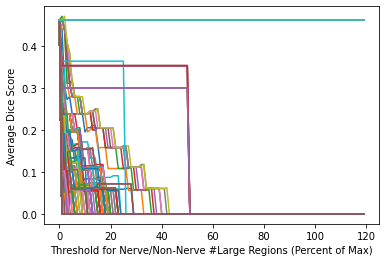

In [28]:
root = r"Basal_Nerve_Density_Images"; 

for largeCutoff in np.arange(start = 7, stop = 100, step = 10):
    for narrowCutoff in np.arange(start = 1, stop = 40, step= 5):
        for orientCutoff in np.arange(start = 0.1, stop = 1, step = 0.1):
            LNOCC_12Patients = {}; diceDictCLNO = {} 
            ###FOR EACH PATIENT IN THE PATIENT LIST
            for subdir, dirs, imgs in os.walk(root):
                imagesInThisFolder = False; patientLNO_CC = []
                ###FOR ALL IMAGES PER A PATIENT-X
                
                for img in imgs:           
                    if(subdir != 'Basal_Nerve_Density_Images\\Control\\N1-od-0'):
                        break
                    imagesInThisFolder = True; ItIsAnImage = "count" not in img and 'jpg' in img
                    if(ItIsAnImage): 
                        df = dictOfAllProperties['%s'%subdir]['%s\%s'%(subdir, img)]
                        patientLNO_CC.append(LNO_CCCount_Original(df, largeCutoff, narrowCutoff, orientCutoff))                           #Does blurring, morphological transforms, and Canny Edge
                        #except: patientLNO_CC.append(0)
                if(imagesInThisFolder == True): LNOCC_12Patients[subdir[27:]] = patientLNO_CC
            dice = calculateDice(LNOCC_12Patients, findDecThreshold(LNOCC_12Patients))
            diceDictCLNO['Large Area Threshold: %i, Narrow Threshold %f, Orient Threshold: %f' %(largeCutoff, narrowCutoff, orientCutoff)] = dice
            print('Large Area Threshold: %i, Narrow Threshold %f Orient Threshold: %f Dice =' %(largeCutoff, narrowCutoff, orientCutoff), dice)

## Misc

In [29]:
max(diceDictCLNO)

'Large Area Threshold: 97, Narrow Threshold 36.000000, Orient Threshold: 0.900000'

In [13]:
dictOfAllProperties['Basal_Nerve_Density_Images\\Control\\N1-od-0']

{'Basal_Nerve_Density_Images\\Control\\N1-od-0\\-00.jpg':       major_axis_length  minor_axis_length   area  orientation  narrowness
 0            455.850116         243.848019  33075     0.063267    1.869403
 4              5.293185           3.084324      9     0.140616    1.716157
 6             13.259825           7.416058     21    -0.668735    1.787988
 7              8.664307           1.253695      9    -0.010751    6.911015
 8              9.165151           2.000000     16     0.000000    4.582576
 ...                 ...                ...    ...          ...         ...
 8352           9.206254           1.828563      9     1.519755    5.034693
 8363          31.158598           0.951753     27    -1.556743   32.738104
 8408           9.850849           1.985817     17     1.549381    4.960602
 8416           9.165151           0.000000      8     1.570796         inf
 8425           9.165151           0.000000      8     1.570796         inf
 
 [1859 rows x 5 columns],
 'B

In [ ]:
len(diceDict)

In [180]:
dD = diceDict
with open('diceDictNarrow123.json','w') as j:
    json.dump(diceDict,j)

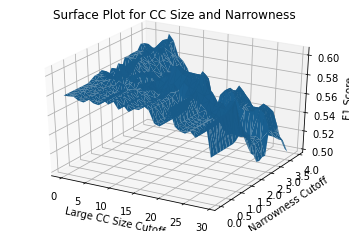

In [201]:
fig = plt.figure(); ax = plt.axes(projection = '3d'); ax.plot_trisurf(x,y,z);cmap = 'magma'; ax.set_title('Surface Plot for CC Size and Narrowness'); ax.set_xlabel('Large CC Size Cutoff'); ax.set_ylabel('Narrowness Cutoff'); ax.set_zlabel('F1 Score')
plt.show()

In [158]:
print(min(diceDict))
DO ORIENTATION AVERAGE DEVIATION
DO HEATMAP
Canny Thresholds: 238, 246, Large Area Threshold: 5, Narrow Threshold 3.500000 0.6005909133102115


Canny Thresholds: 238, 246, Large Area Threshold: 10, Narrow Threshold 0.500000


In [207]:
min(diceDict)

'Canny Thresholds: 238, 246, Large Area Threshold: 0, Narrow Threshold 0.000000'

In [17]:
my_dict = diceDictCLNO
key_max = max(my_dict.keys(), key=(lambda k: my_dict[k]))
key_min = min(my_dict.keys(), key=(lambda k: my_dict[k]))

print('Maximum Value: ',my_dict[key_max])
print('Minimum Value: ',my_dict[key_min])

Maximum Value:  0.5986842311630262
Minimum Value:  0.5986842311630262


In [177]:
my_dict = diceDict
key_max = max(my_dict.keys(), key=(lambda k: my_dict[k]))
key_min = min(my_dict.keys(), key=(lambda k: my_dict[k]))

print('Maximum Value: ',my_dict[key_max])
print('Minimum Value: ',my_dict[key_min])


Maximum Value:  0.6056484105840595
Minimum Value:  0.4986275553750693


In [ ]:
dice = calculateDice(LNOCC_12Patients, findDecThreshold(LNOCC_12Patients))
print(dice)

with PdfPages('scatterplotsNarrowLarge%sAnd%s-Conditions3.pdf' %(largeCutoff,narrowCutoff)) as pdf:
    fig = plt.figure(figsize=(12,12))
    for pat in range(0,12):
        ax = fig.add_subplot(4,3,pat+1); patient = list(LNOCC_12Patients.keys());x = np.arange(0,40);y = LNOCC_12Patients[patient[pat]]; ax.plot(x,y);nerveStart = whichImagesHaveNerves['First Nerve Image'].loc[pat]; nerveEnd = whichImagesHaveNerves['Last Nerve Image'].loc[pat]; plt.xlabel('Image Number'); plt.ylabel('Number of Large Narrow Regions'); plt.axvline(x = nerveStart, color = 'b'); plt.axvline(x = nerveEnd, color = 'b')
    pdf.savefig(fig)

### Half attempt at KL divergence test

In [12]:
def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)
    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

In [22]:
dictOfAllKL = {}
for subdir in dictOfAllProperties.keys():
    dictOfAllKL[subdir] = {}
    KLDict = []
    for img in dictOfAllProperties[subdir].keys():
        orientdist = []
        d = dictOfAllProperties['%s'%subdir]['%s'%(img)]['orientation']
        print(d)
        for i in range(0,len(d)):
            if(abs(d[i]) > 0.06):
                orientdist.append(d[i])
        uniformorientdist = np.full(1,len(orientdist),mean(orientdist))
        KLDict[img] = KL(orientdist, uniformorientdist)
    dictOfAllKL[subdir] = KLDict

0.06326720373379505


KeyError: 1

In [ ]:
for i in 